In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib.image as mpimage
from numpy.linalg import svd

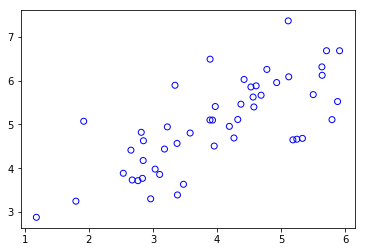

In [3]:
data = loadmat('E:\Mat_Work\machine-learning-ex7\machine-learning-ex7\ex7\ex7data1.mat')
X = data['X']
plt.scatter(X[:,0],X[:,1],marker='o',facecolors='none',edgecolors='b')

In [4]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_normed = (X - mu)/sigma
    return X_normed,mu,sigma

In [5]:
def PCA(X):
    (m,n) = X.shape
    covM = 1/m * X.T @ X
    U,S,V = svd(covM)
    return U,S,V

(2, 8)

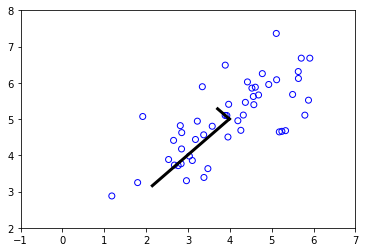

In [6]:
X_norm,mu,sigma = featureNormalize(X)
U,S = PCA(X_norm)[:2]

plt.scatter(X[:,0],X[:,1],marker='o',facecolors='none',edgecolors='b')
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color='black',linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color='black',linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [7]:
print("Top eigenvector U(:,1) =:",U[:,0])

Top eigenvector U(:,1) =: [-0.70710678 -0.70710678]


In [8]:
def projectData(X,U,K):
    m = X.shape[0]
    U_reduce = U[:,:K]
    Z = np.zeros((m,K))
    for i in range(m):
            Z[i,:] = X[i,:] @ U_reduce
    return Z

In [9]:
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578517


In [36]:
def recoverData(Z,U,K):
    m = Z.shape[0]
    n = U.shape[0]
    U_reduce = U[:,:K]
    for i in range(m):
        X2[i,:] = Z[i,:] @ U_reduce.T
    return X2

In [11]:
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


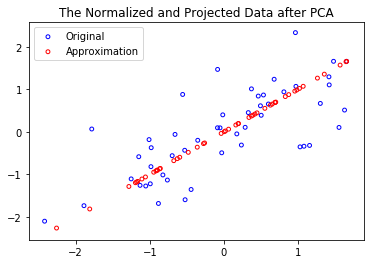

In [12]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

In [14]:
#face image dataset

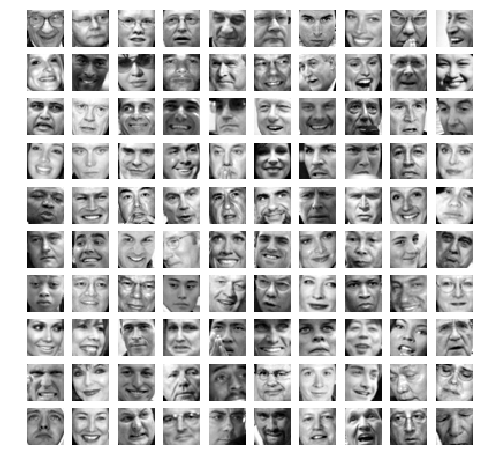

In [13]:
data2 = loadmat('E:\Mat_Work\machine-learning-ex7\machine-learning-ex7\ex7\ex7faces.mat')
X2 = data2['X']
fig,ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X2[i+j].reshape(32,32,order='F'),cmap='gray')
        ax[int(i/10),j].axis('off')

In [24]:
X2_norm = featureNormalize(X2)[0]
U2 = PCA(X2_norm)[0]
K2 = 100
Z2 = projectData(X2_norm,U,K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


In [37]:
X_rec2 = recoverData(Z2,U2,K2)

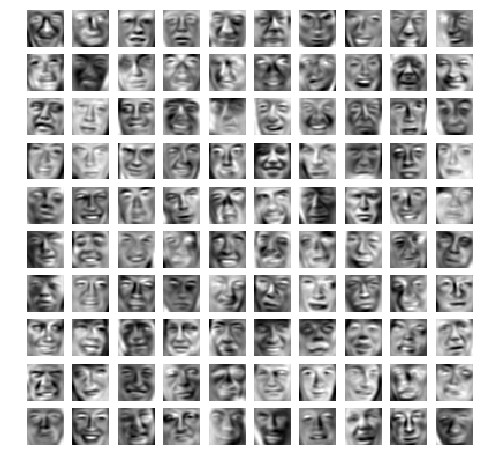

In [38]:
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order='F'),cmap='gray')
        ax3[int(i/10),j].axis('off')